In [2]:
import pickle
import pandas as pd
import seaborn as sns

result_file = "../results/2022-04-02_20_24_12/2022-04-02_20_24_12_simulation_entropy_vs_pure_LDPC_weighted_model.pickle"
summary_file = "../results/2022-04-02_20_24_12/2022-04-02_20_24_12_summary_entropy_vs_pure_LDPC_weighted_model.pickle"
with open(result_file, 'rb') as f:
    results = pickle.load(f)

with open(summary_file, 'rb') as f:
    summary = pickle.load(f)
sns.set_theme(style="darkgrid")

In [12]:
ber_df = pd.DataFrame({
    "BP": pd.Series(summary['ldpc_ber'], index=summary['raw_ber'], name="BP"),
    "entropy": pd.Series(summary['entropy_ber'], index=summary['raw_ber'], name="entropy"),
    "raw": pd.Series(summary['raw_ber'], index=summary['raw_ber'], name="raw")
}, index=pd.Series(summary['raw_ber'], index=summary['raw_ber'], name="raw"))
ber_df_m = ber_df.melt(var_name="decoder", value_name="ber", ignore_index=False)

decoding_df = pd.DataFrame({
    "BP": pd.Series(summary['ldpc_buffer_success_rate'], index=summary['raw_ber'], name="BP"),
    "entropy": pd.Series(summary['entropy_buffer_success_rate'], index=summary['raw_ber'], name="entropy")
}, index=pd.Series(summary['raw_ber'], index=summary['raw_ber'], name="raw"))
decoding_df_m = decoding_df.melt(var_name="decoder", value_name="decode success rate", ignore_index=False)

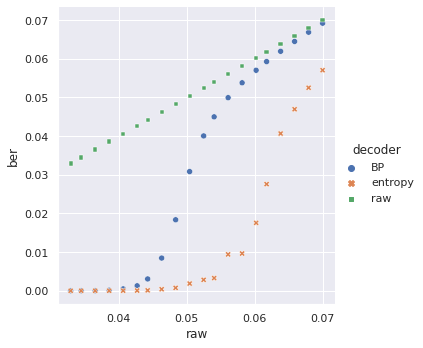

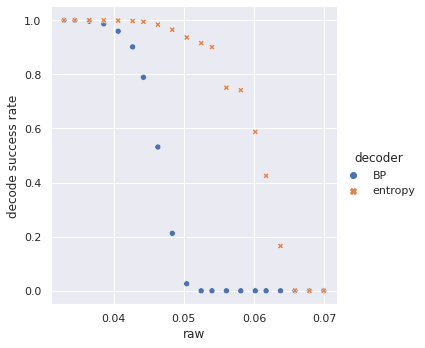

In [13]:
sns.relplot(x="raw", y="ber", hue="decoder", style="decoder", data=ber_df_m)
sns.relplot(x="raw", y="decode success rate", hue="decoder", style="decoder", data=decoding_df_m)

In [17]:
import plotly.express as px
fig = px.scatter(ber_df_m, y="ber", color="decoder", symbol="decoder")
fig.update_traces(marker_size=10)
fig.show()
fig = px.scatter(decoding_df_m, y="decode success rate", color="decoder", symbol="decoder")
fig.update_traces(marker_size=10)
fig.show()